In [1]:
cd /Users/andreibirladeanu/Documents/Data

/Users/andreibirladeanu/Documents/Data


In [17]:
import pandas as pd
data = pd.read_excel('rinab_processing.xlsx')


In [18]:
# creating one series for subject ID's
filtered_subjects = pd.Series(data=data['Subject_id_FILTERED'])

In [19]:
# remove filtered_subjects column from data so that I can merge it later
data = data.iloc[:,1:] 
#.ix[row slice, column slice] 

In [20]:
rinab_data = data.merge(filtered_subjects, how='inner', left_on='Subject_ID', right_on='Subject_id_FILTERED')

In [119]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [21]:
rinab_data = rinab_data.iloc[:,:-1]
rinab_data = rinab_data.sort_values(by='Subject_ID', ignore_index=True)

In [22]:
rinab_data

,Subject_ID,A3. The child shows lack of a preference: does not show a particular interest in interacting with the caregiver and(or) the stranger,A5. The child's behaviour does not tend to elicit care and nurturing behaviour from the caregiver,B1. The child is discomforted with new situations and with the presence of strangers,B3. The child gives preferences and seems to be more comfortable with solitary or parallel play instead of interactive play,B4. The child explores out of synchrony with the caregiver's behaviour and availability,C1. The child shows withdrawing behaviours with the caregiver,C2. The child shows a reduced or absent social and emotional reciprocity with the caregiver,C3. The child is very compliant with the caregiver's requests,C4. The child is hypervigilant and/or fearful of the caregiver,C5. The child shows limited positive affect in moments where it would be expected,C6. The child does not initiate social interactions
0,1043,1.0,2.0,1.0,0.0,1.0,0,0,0,0,0,0
1,1047,0.0,0.0,3.0,0.0,0.0,1,2,4,3,1,1
2,1049,2.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0
3,1053,0.0,1.0,2.0,0.0,0.0,0,0,0,0,0,0
4,1059,4.0,2.0,4.0,NaN,NaN,4,4,1,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
56,1269,0.0,0.0,1.0,0.0,0.0,1,1,0,0,1,1
57,1282,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
58,2009,1.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0
59,2025,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0


In [33]:
#rinab_data.to_excel("rinab_processed.xlsx")

In [23]:
# taking total of each row
rinab_data["total"]= rinab_data.iloc[:,1:].sum(axis=1)

In [24]:
rinab_data

,Subject_ID,A3. The child shows lack of a preference: does not show a particular interest in interacting with the caregiver and(or) the stranger,A5. The child's behaviour does not tend to elicit care and nurturing behaviour from the caregiver,B1. The child is discomforted with new situations and with the presence of strangers,B3. The child gives preferences and seems to be more comfortable with solitary or parallel play instead of interactive play,B4. The child explores out of synchrony with the caregiver's behaviour and availability,C1. The child shows withdrawing behaviours with the caregiver,C2. The child shows a reduced or absent social and emotional reciprocity with the caregiver,C3. The child is very compliant with the caregiver's requests,C4. The child is hypervigilant and/or fearful of the caregiver,C5. The child shows limited positive affect in moments where it would be expected,C6. The child does not initiate social interactions,total
0,1043,1.0,2.0,1.0,0.0,1.0,0,0,0,0,0,0,5.0
1,1047,0.0,0.0,3.0,0.0,0.0,1,2,4,3,1,1,15.0
2,1049,2.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,3.0
3,1053,0.0,1.0,2.0,0.0,0.0,0,0,0,0,0,0,3.0
4,1059,4.0,2.0,4.0,NaN,NaN,4,4,1,4,4,4,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1269,0.0,0.0,1.0,0.0,0.0,1,1,0,0,1,1,5.0
57,1282,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2.0
58,2009,1.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0,4.0
59,2025,1.0,0.0,1.0,1.0,0.0,0,0,0,0,0,0,3.0


In [27]:
#rinab_nona = rinab_data.dropna()

<AxesSubplot:>

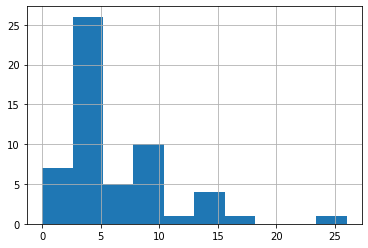

In [51]:
rinab_nona.total.hist()

In [52]:
rinab_nona.total.describe()

count    55.000000
mean      6.345455
std       4.675461
min       0.000000
25%       3.000000
50%       5.000000
75%       8.500000
max      26.000000
Name: total, dtype: float64

In [53]:
rinab_nona.total.var()

21.85993265993266

In [ ]:
#number of bins = sqrt(total no of points)
#bin width = (max-min) / number of bins

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# code from https://github.com/AnalyticsInsightsNinja/PythonVisualAnalytics/blob/master/01_AV_Adavced_Histogram.ipynb
# Plot the Histogram from the random data

def histogram_plot(column, title='Rinab', ylabel='frequency', xlabel='rinab', bin_no=7, legend_title='N=61'):
    fig, ax = plt.subplots(figsize=(8,8))
    counts, bins, patches = ax.hist(column, bins=bin_no, facecolor='mediumaquamarine', edgecolor='gray')

    ax.set_xticks(bins.round(2))
    plt.xticks(rotation=0)

    # Set the graph title and axes titles
    plt.title(title, fontsize=20)
    plt.ylabel(ylabel, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)

    # Calculate bar centre to display the count of data points and %
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax.get_yticks()[1] * 0.25

    #Display the the count of data points and % for each bar in histogram
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

    plt.legend(fontsize=10, title=legend_title)
    

No handles with labels found to put in legend.
No handles with labels found to put in legend.


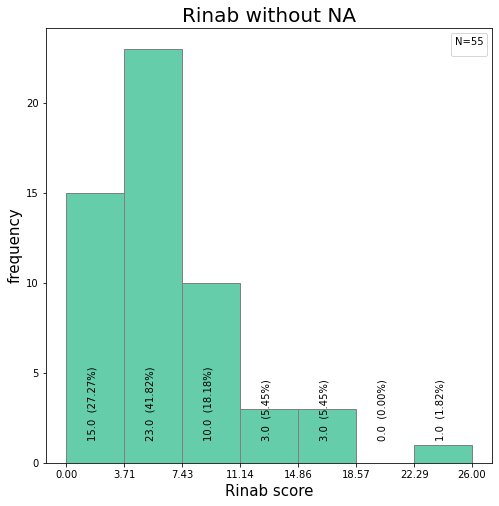

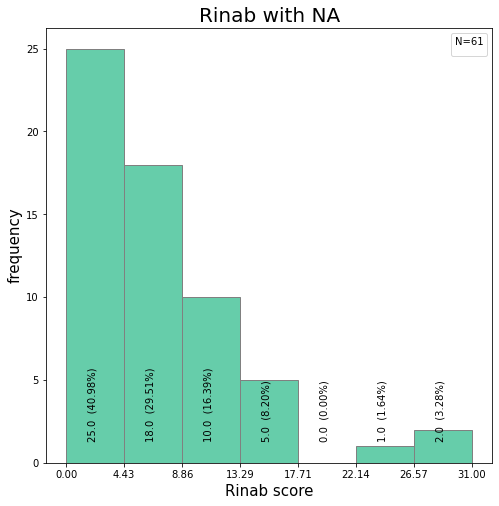

In [41]:
histogram_plot(rinab_nona.total, title='Rinab without NA', legend_title='N=55', xlabel='Rinab score')
histogram_plot(rinab_data.total, title='Rinab with NA', legend_title='N=61', xlabel='Rinab score')



ValueError: supplied range of [-inf, 3.4339872044851463] is not finite

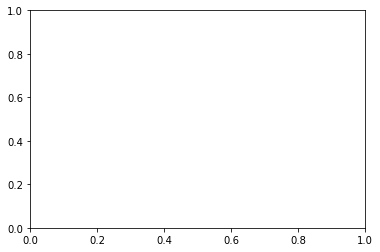

In [62]:
rinab_data.total.apply(np.log).hist()

In [64]:
rinab_data.total.apply(np.log)

0     1.609438
1     2.708050
2     1.098612
3     1.098612
4     3.433987
5     1.098612
6     2.564949
7     1.386294
8     2.197225
9     1.609438
10    1.609438
11    1.098612
12    1.609438
13        -inf
14    1.609438
15    1.945910
16    1.791759
17    1.386294
18    2.302585
19    1.609438
20    1.386294
21    2.079442
22    1.609438
23    0.693147
24    2.772589
25    1.386294
26    2.197225
27    2.484907
28    2.302585
29    0.000000
30    1.386294
31    1.098612
32    2.302585
33    3.258097
34    1.945910
35    2.079442
36    1.386294
37    0.693147
38    1.609438
39    0.000000
40    0.693147
41    2.079442
42    0.693147
43    1.945910
44    2.708050
45    2.197225
46    2.302585
47    2.833213
48    1.945910
49    1.098612
50    1.386294
51    1.609438
52        -inf
53    3.401197
54    1.098612
55    2.708050
56    1.609438
57    0.693147
58    1.386294
59    1.098612
60    2.564949
Name: total, dtype: float64

In [29]:
# now trying to merge the DAI with the previous dataset
data2 = pd.read_excel('Rinab+DAI+age.xlsx')

In [30]:
# setting a common index so I can merge them
rinab_data=rinab_data.set_index('Subject_ID')
data2=data2.set_index('Subject_ID')

In [31]:
# merging the two datasets
rinab_dai_age = data2.merge(rinab_data, how='right', left_on='Subject_ID', right_on='Subject_ID')
rinab_dai_age

,AgeT1,DAIscoreT1,A3. The child shows lack of a preference: does not show a particular interest in interacting with the caregiver and(or) the stranger,A5. The child's behaviour does not tend to elicit care and nurturing behaviour from the caregiver,B1. The child is discomforted with new situations and with the presence of strangers,B3. The child gives preferences and seems to be more comfortable with solitary or parallel play instead of interactive play,B4. The child explores out of synchrony with the caregiver's behaviour and availability,C1. The child shows withdrawing behaviours with the caregiver,C2. The child shows a reduced or absent social and emotional reciprocity with the caregiver,C3. The child is very compliant with the caregiver's requests,C4. The child is hypervigilant and/or fearful of the caregiver,C5. The child shows limited positive affect in moments where it would be expected,C6. The child does not initiate social interactions,total
Subject_ID,,,,,,,,,,,,,,
1043,60.0,0.0,1.0,2.0,1.0,0.0,1.0,0,0,0,0,0,0,5.0
1047,52.0,6.0,0.0,0.0,3.0,0.0,0.0,1,2,4,3,1,1,15.0
1049,43.0,2.0,2.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,3.0
1053,33.0,2.0,0.0,1.0,2.0,0.0,0.0,0,0,0,0,0,0,3.0
1059,41.0,0.0,4.0,2.0,4.0,NaN,NaN,4,4,1,4,4,4,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,19.0,NaN,0.0,0.0,1.0,0.0,0.0,1,1,0,0,1,1,5.0
1282,60.0,NaN,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,2.0
2009,25.0,3.0,1.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0,4.0


In [149]:
cd ~/Documents/Data

/Users/andreibirladeanu/Documents/Data


In [150]:
rinab_dai_age.to_excel('final_rinab+dai.xlsx', na_rep='NA')

In [32]:
# Scores on Rinab for participants with missing q's B3 and B4
# loc selects index by label, iloc by position
rinab_data.loc[[1059,1195,1250],'total']

Subject_ID
1059    31.0
1195    15.0
1250    30.0
Name: total, dtype: float64

In [33]:
# the mean of the rinab total score excluding those NA subjects rounded to 22 decimals
round(rinab_nona.total.mean(), 2), round(rinab_nona.total.median(), 2) 

(6.35, 5.0)

In [34]:
# Scores on Rinab for participants with missing q A3
rinab_data.loc[[1112,1188,1217,1195],'total']

Subject_ID
1112     2.0
1188     2.0
1217    17.0
1195    15.0
Name: total, dtype: float64

In [177]:
# compute Spearman correlation (due to data being ordinal and non-normally distributed)
rinab_dai_age.corr(method='spearman')

,Subject_ID,AgeT1,DAIscoreT1,A3. The child shows lack of a preference: does not show a particular interest in interacting with the caregiver and(or) the stranger,A5. The child's behaviour does not tend to elicit care and nurturing behaviour from the caregiver,B1. The child is discomforted with new situations and with the presence of strangers,B3. The child gives preferences and seems to be more comfortable with solitary or parallel play instead of interactive play,B4. The child explores out of synchrony with the caregiver's behaviour and availability,C1. The child shows withdrawing behaviours with the caregiver,C2. The child shows a reduced or absent social and emotional reciprocity with the caregiver,C3. The child is very compliant with the caregiver's requests,C4. The child is hypervigilant and/or fearful of the caregiver,C5. The child shows limited positive affect in moments where it would be expected,C6. The child does not initiate social interactions,total
Subject_ID,1.000000,-0.123088,0.184860,-0.105945,0.079456,-0.150566,0.223244,-0.005441,0.187101,0.181226,-0.142798,-0.163740,0.050104,0.195344,-0.022671
AgeT1,-0.123088,1.000000,-0.029215,0.121740,-0.044207,0.237226,-0.336419,-0.384041,-0.246829,-0.349672,0.221426,0.002389,-0.239562,-0.307750,-0.264500
DAIscoreT1,0.184860,-0.029215,1.000000,0.107907,0.241562,0.027936,0.133720,0.364720,0.325132,0.505303,-0.064046,0.118673,0.036656,0.412430,0.298644
A3. The child shows lack of a preference: does not show a particular interest in interacting with the caregiver and(or) the stranger,-0.105945,0.121740,0.107907,1.000000,0.491898,-0.135483,0.018502,0.224064,0.188492,0.111445,0.208762,0.195567,0.064107,0.118760,0.374470
A5. The child's behaviour does not tend to elicit care and nurturing behaviour from the caregiver,0.079456,-0.044207,0.241562,0.491898,1.000000,0.028937,0.226025,0.408059,0.290997,0.334190,0.058237,0.073482,0.197907,0.305138,0.510582
B1. The child is discomforted with new situations and with the presence of strangers,-0.150566,0.237226,0.027936,-0.135483,0.028937,1.000000,-0.050675,-0.126360,0.160854,0.046005,0.107943,0.510048,0.104724,0.119213,0.260742
B3. The child gives preferences and seems to be more comfortable with solitary or parallel play instead of interactive play,0.223244,-0.336419,0.133720,0.018502,0.226025,-0.050675,1.000000,0.484707,0.385909,0.510562,-0.031550,0.110555,0.243774,0.396872,0.602774
B4. The child explores out of synchrony with the caregiver's behaviour and availability,-0.005441,-0.384041,0.364720,0.224064,0.408059,-0.126360,0.484707,1.000000,0.414515,0.465418,-0.262052,0.039626,-0.003306,0.389270,0.521442
C1. The child shows withdrawing behaviours with the caregiver,0.187101,-0.246829,0.325132,0.188492,0.290997,0.160854,0.385909,0.414515,1.000000,0.774135,-0.003162,0.255624,0.380680,0.859661,0.664017
C2. The child shows a reduced or absent social and emotional reciprocity with the caregiver,0.181226,-0.349672,0.505303,0.111445,0.334190,0.046005,0.510562,0.465418,0.774135,1.000000,0.102178,0.267561,0.525193,0.771905,0.732006


In [190]:
from scipy.stats import spearmanr
import pandas as pd

def calculate_pvalues(df):
    df = df._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c],nan_policy='omit')[1], 4)
    return pvalues

In [191]:
calculate_pvalues(rinab_dai_age) 

,Subject_ID,AgeT1,DAIscoreT1,A3. The child shows lack of a preference: does not show a particular interest in interacting with the caregiver and(or) the stranger,A5. The child's behaviour does not tend to elicit care and nurturing behaviour from the caregiver,B1. The child is discomforted with new situations and with the presence of strangers,B3. The child gives preferences and seems to be more comfortable with solitary or parallel play instead of interactive play,B4. The child explores out of synchrony with the caregiver's behaviour and availability,C1. The child shows withdrawing behaviours with the caregiver,C2. The child shows a reduced or absent social and emotional reciprocity with the caregiver,C3. The child is very compliant with the caregiver's requests,C4. The child is hypervigilant and/or fearful of the caregiver,C5. The child shows limited positive affect in moments where it would be expected,C6. The child does not initiate social interactions,total
Subject_ID,0,0.3488,0.1766,0.4328,0.5427,0.2468,0.0892,0.9677,0.1488,0.1622,0.2723,0.2073,0.7014,0.1314,0.8623
AgeT1,0.3488,0,0.8323,0.3714,0.7373,0.068,0.0098,0.0032,0.0573,0.0062,0.0891,0.9855,0.0652,0.0168,0.0411
DAIscoreT1,0.1766,0.8323,0,0.4464,0.0756,0.8396,0.3398,0.0079,0.0154,0.0001,0.6423,0.3882,0.7905,0.0018,0.0268
A3. The child shows lack of a preference: does not show a particular interest in interacting with the caregiver and(or) the stranger,0.4328,0.3714,0.4464,0,0.0001,0.315,0.8933,0.1001,0.1603,0.4092,0.1191,0.1449,0.6357,0.3789,0.0041
A5. The child's behaviour does not tend to elicit care and nurturing behaviour from the caregiver,0.5427,0.7373,0.0756,0.0001,0,0.8248,0.0852,0.0015,0.0229,0.0085,0.6557,0.5736,0.1263,0.0168,0
B1. The child is discomforted with new situations and with the presence of strangers,0.2468,0.068,0.8396,0.315,0.8248,0,0.7031,0.3446,0.2156,0.7248,0.4076,0,0.4219,0.3601,0.0424
B3. The child gives preferences and seems to be more comfortable with solitary or parallel play instead of interactive play,0.0892,0.0098,0.3398,0.8933,0.0852,0.7031,0,0.0001,0.0025,0,0.8125,0.4045,0.0628,0.0019,0
B4. The child explores out of synchrony with the caregiver's behaviour and availability,0.9677,0.0032,0.0079,0.1001,0.0015,0.3446,0.0001,0,0.0012,0.0002,0.0469,0.7677,0.9804,0.0025,0
C1. The child shows withdrawing behaviours with the caregiver,0.1488,0.0573,0.0154,0.1603,0.0229,0.2156,0.0025,0.0012,0,0,0.9807,0.0468,0.0025,0,0
C2. The child shows a reduced or absent social and emotional reciprocity with the caregiver,0.1622,0.0062,0.0001,0.4092,0.0085,0.7248,0,0.0002,0,0,0.4333,0.0371,0,0,0


No handles with labels found to put in legend.


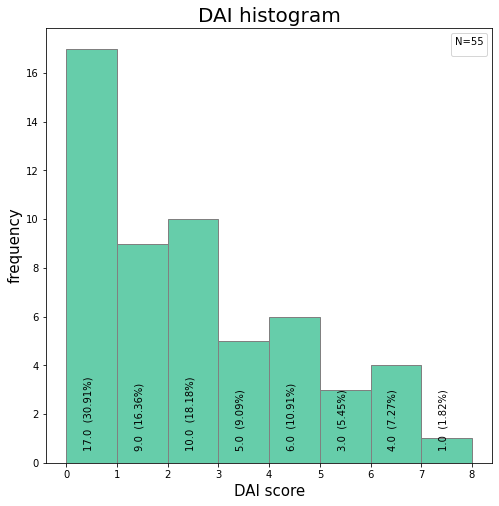

In [49]:
histogram_plot(rinab_dai_age['DAIscoreT1'], title='DAI histogram', ylabel='frequency', xlabel='DAI score', bin_no=[0,1,2,3,4,5,6,7,8], legend_title='N=55')